In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
type(california_housing)

sklearn.utils.Bunch

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
california_housing.data.shape

(20640, 8)

In [ ]:
type(california_housing.data)

pandas.core.frame.DataFrame

In [ ]:
california_housing.target.shape

(20640,)

In [ ]:
type(california_housing.target)

pandas.core.series.Series

In [ ]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
california_housing.target_names

['MedHouseVal']

frame = data + target

In [ ]:
california_housing.frame.head() # data and target

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f736b8e3a90>,
      dtype=object)

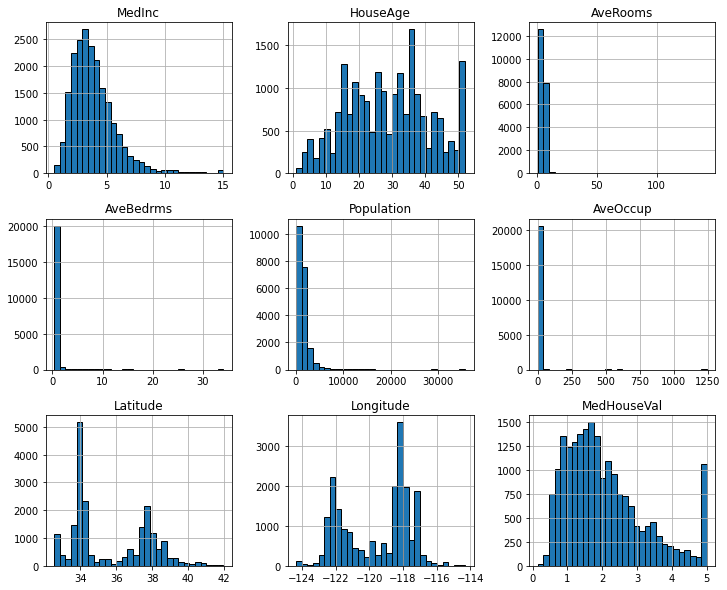

In [ ]:
california_housing.frame.hist(figsize=(12,10), bins=30, edgecolor='black')

In [ ]:
california_housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
import seaborn as sns

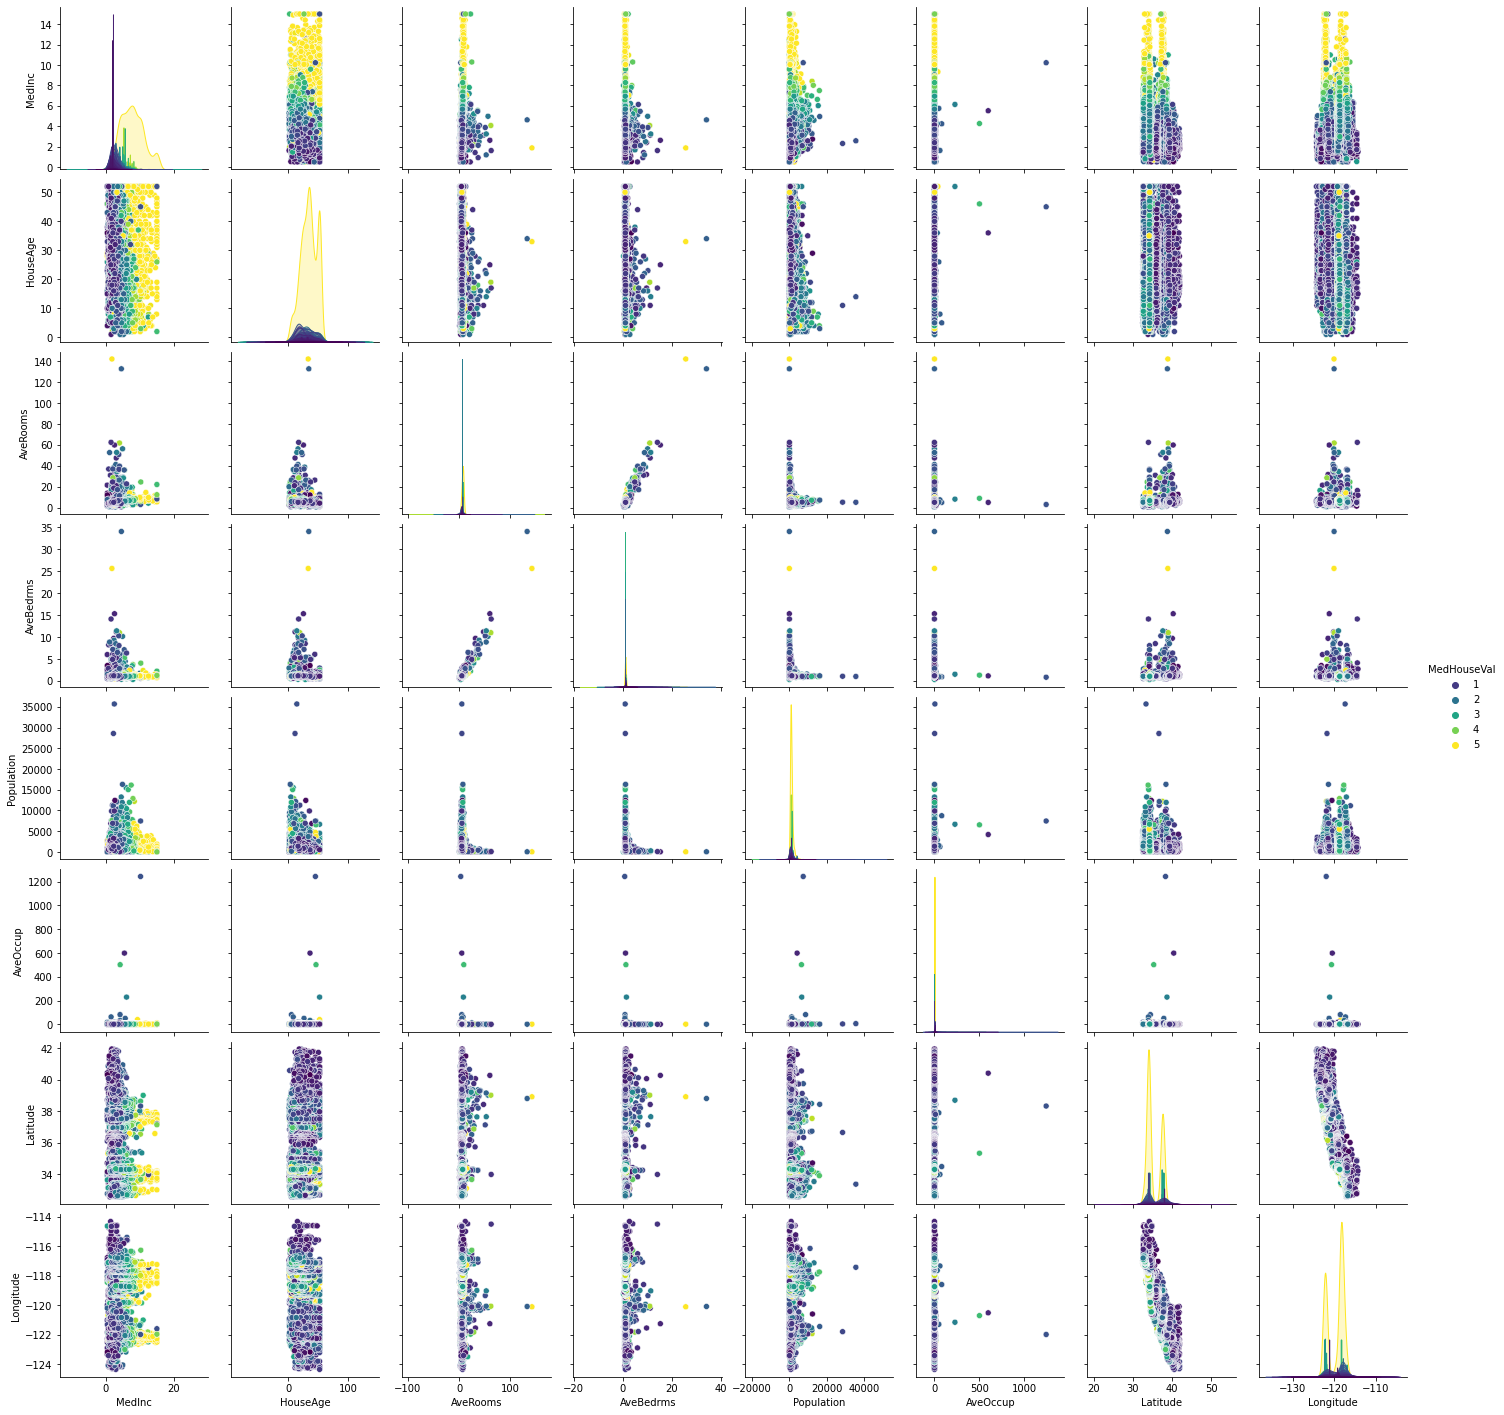

In [ ]:
sns.pairplot(data=california_housing.frame, hue='MedHouseVal', palette='viridis')

**Fitting LinearRegression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import loguniform, uniform

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, ShuffleSplit, validation_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")

In [ ]:
np.random.seed(306)

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [ ]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)
train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels, random_state=42)

In [ ]:
lg_pipeline = Pipeline([('feature_scaling', StandardScaler()),
         ('lg', LinearRegression())])
lg_results = cross_validate(lg_pipeline, com_train_features, com_train_labels, cv=cv, scoring='neg_mean_absolute_error', 
                            return_train_score=True, return_estimator=True)

lg_train_error = -1 * lg_results['train_score']
lg_test_error = -1 * lg_results['test_score']

In [ ]:
lg_train_error.mean(), lg_train_error.std()

(0.5304021630418913, 0.002321293528619106)

In [ ]:
lg_test_error.mean(), lg_test_error.std()

(0.5270142316974493, 0.007781288307852414)

**Fit SGDRegressor**

In [ ]:
sgd_pipeline = Pipeline([('feature_scaling', StandardScaler()),
                        ('sgd', SGDRegressor(max_iter=np.ceil(1e6/com_train_features.shape[0]), early_stopping=True, 
                                             eta0=1e-4, learning_rate='constant', tol=1e-5, validation_fraction=0.1, 
                                             n_iter_no_change=5, average=10, random_state=42))])

sgd_results = cross_validate(sgd_pipeline, com_train_features, com_train_labels, cv=cv, scoring='neg_mean_absolute_error',
                            return_train_score=True, return_estimator=True)

sgd_train_error = -1 * sgd_results['train_score']
sgd_test_error = -1 * sgd_results['test_score']  # note that this is actually validation set (set to 10% of com_train)

In [ ]:
print(sgd_train_error.mean(), sgd_train_error.std())
print(sgd_test_error.mean(), sgd_test_error.std() )

0.5640399853222634 0.02266704205287487
0.5607392935103552 0.025296964206753057


Both errors are close, but not exactly low.  So, let's perform polynomial regression on them

In [ ]:
poly_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                        ('feature_scaling', StandardScaler()),
                        ('lg', LinearRegression())])

poly_results = cross_validate(poly_pipeline, com_train_features, com_train_labels, cv=cv, scoring='neg_mean_absolute_error',
                            return_train_score=True, return_estimator=True)

poly_train_error = -1 * poly_results['train_score']
poly_test_error = -1 * poly_results['test_score']

In [ ]:
print(poly_train_error.mean(), poly_train_error.std())
print(poly_test_error.mean(), poly_test_error.std() )

0.4609643523643526 0.002977081038774082
0.4854459947853935 0.03031241731076378


Now, let's only interaction features after applying polynomial features

In [ ]:
poly_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2, interaction_only=True)),
                        ('feature_scaling', StandardScaler()),
                        ('lg', LinearRegression())])

poly_results = cross_validate(poly_pipeline, com_train_features, com_train_labels, cv=cv, scoring='neg_mean_absolute_error',
                            return_train_score=True, return_estimator=True)

poly_train_error = -1 * poly_results['train_score']
poly_test_error = -1 * poly_results['test_score']

In [ ]:
print(poly_train_error.mean(), poly_train_error.std())
print(poly_test_error.mean(), poly_test_error.std() )

0.4778194330975899 0.002820194504598809
0.4968715693459049 0.02438651181247636


Now, let's use *validation_curve* and find the polynomial degree that would yield the least error.

In [ ]:
degree = [1,2,3,4,5]
train_scores, test_scores = validation_curve(poly_pipeline, com_train_features, com_train_labels, param_name='poly__degree', 
                 param_range=degree, cv=cv, scoring='neg_mean_absolute_error')
train_errors, test_errors = -train_scores, -test_scores

Text(0.5, 1.0, 'Validation curve for polynomial regression')

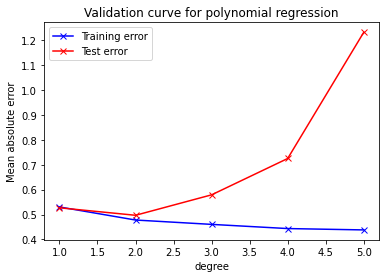

In [ ]:
plt.plot(degree, train_errors.mean(axis=1), 'b-x', label='Training error')
plt.plot(degree, test_errors.mean(axis=1), 'r-x', label='Test error')
plt.legend()

plt.xlabel('degree')
plt.ylabel('Mean absolute error')
plt.title('Validation curve for polynomial regression')

From the above graph, it's clear that the least error occurs degree 2.

Polynomial models tend to overfit.  So, let's apply a regularization.

**Ridge Regularization**

In [ ]:
ridge_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                        ('feature_scaling', StandardScaler()),
                        ('ridge', Ridge(alpha=0.5))])  # alpha is the regularization rate

ridge_results = cross_validate(ridge_pipeline, com_train_features, com_train_labels, cv=cv, scoring='neg_mean_absolute_error',
                            return_train_score=True, return_estimator=True)

ridge_train_error = -1 * ridge_results['train_score']
ridge_test_error = -1 * ridge_results['test_score']

In [ ]:
print(ridge_train_error.mean(), ridge_train_error.std())
print(ridge_test_error.mean(), ridge_test_error.std() )

0.48056875234962393 0.003485200424375767
0.48669297649039295 0.0056520049058045455


Find the best alpha (ridge regularization rate) using RidgeCV.

In [ ]:
alpha_list = np.logspace(-4, 0, num=20)
ridge_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                        ('feature_scaling', StandardScaler()),
                        ('ridge', RidgeCV(alphas=alpha_list, cv=cv, scoring='neg_mean_absolute_error'))])  # alpha is the regularization rate

ridge_cv_results = ridge_pipeline.fit(com_train_features, com_train_labels)

ridge_cv_results

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('feature_scaling', StandardScaler()),
                ('ridge',
                 RidgeCV(alphas=array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00]),
                         cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
                         scoring='neg_mean_absolute_error'))])

In [ ]:
print(f"Score with best alpha is {ridge_cv_results[-1].best_score_}")
print(f"Best value of alpha is {ridge_cv_results[-1].alpha_}")

Score with best alpha is -0.4729407010073685
Best value of alpha is 0.007847599703514606


Find the best alpha (ridge regularization rate) using GridSearchCV.

In [ ]:
ridge_grid_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                        ('feature_scaling', StandardScaler()),
                        ('ridge', Ridge())])

param_grid = {'poly__degree': (1,2,3),
             'ridge__alpha': np.logspace(-4, 0, num=20)}

ridge_grid_search = GridSearchCV(ridge_grid_pipeline, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error', return_train_score=True)
ridge_grid_search.fit(com_train_features, com_train_labels)
ridge_grid_search.best_index_

29

In [ ]:
mean_train_error = -1 * ridge_grid_search.cv_results_['mean_train_score'][ridge_grid_search.best_index_]
std_train_error = ridge_grid_search.cv_results_['std_train_score'][ridge_grid_search.best_index_]
mean_test_error = -1 * ridge_grid_search.cv_results_['mean_test_score'][ridge_grid_search.best_index_]
std_test_error = ridge_grid_search.cv_results_['std_test_score'][ridge_grid_search.best_index_]

In [ ]:
print(mean_train_error, std_train_error)
print(mean_test_error, std_test_error)

0.46267528613772946 0.0035139479066937447
0.4738651176998097 0.01459629356814875


In [ ]:
print(f"Best value of hyper-parameters is {ridge_grid_search.best_params_}")

Best value of hyper-parameters is {'poly__degree': 2, 'ridge__alpha': 0.007847599703514606}


In [ ]:
print(f"Best value for score is {ridge_grid_search.best_score_}")

Best value for score is -0.4738651176998097


**Lasso Regularization**

In [ ]:
lasso_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                        ('feature_scaling', StandardScaler()),
                        ('lasso', Lasso(alpha=0.01))])  # alpha is the regularization rate

lasso_results = cross_validate(lasso_pipeline, com_train_features, com_train_labels, cv=cv, scoring='neg_mean_absolute_error',
                            return_train_score=True, return_estimator=True)

lasso_train_error = -1 * lasso_results['train_score']
lasso_test_error = -1 * lasso_results['test_score']

In [ ]:
print(lasso_train_error.mean(), lasso_train_error.std())
print(lasso_test_error.mean(), lasso_test_error.std() )

0.5293087458828422 0.0027964209722316806
0.5279892540601925 0.007894893222386762


LassoCV uses a different approach than RidgeCV, so not using here.

Find the best alpha (lasso regularization rate) using GridSearchCV.

In [ ]:
lasso_grid_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                        ('feature_scaling', StandardScaler()),
                        ('lasso', Lasso())])

param_grid = {'poly__degree': (1,2,3),
             'lasso__alpha': np.logspace(-4, 0, num=20)}

lasso_grid_search = GridSearchCV(lasso_grid_pipeline, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error', return_train_score=True)
lasso_grid_search.fit(com_train_features, com_train_labels)
lasso_grid_search.best_index_

2

In [ ]:
mean_train_error = -1 * lasso_grid_search.cv_results_['mean_train_score'][lasso_grid_search.best_index_]
std_train_error = lasso_grid_search.cv_results_['std_train_score'][lasso_grid_search.best_index_]
mean_test_error = -1 * lasso_grid_search.cv_results_['mean_test_score'][lasso_grid_search.best_index_]
std_test_error = lasso_grid_search.cv_results_['std_test_score'][lasso_grid_search.best_index_]

In [ ]:
print(mean_train_error, std_train_error)
print(mean_test_error, std_test_error)

0.4621567474002089 0.0029073058576692496
0.4879830445339136 0.04575632976840536


In [ ]:
print(f"Best value of hyper-parameters is {lasso_grid_search.best_params_}")

Best value of hyper-parameters is {'lasso__alpha': 0.0001, 'poly__degree': 3}


In [ ]:
print(f"Best value for score is {lasso_grid_search.best_score_}")

Best value for score is -0.4879830445339136


**SGD Regularization**

In [ ]:
sgd_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                        ('feature_scaling', StandardScaler()),
                        ('sgd', SGDRegressor(penalty='elasticnet', random_state=42))])

sgd_results = cross_validate(sgd_pipeline, com_train_features, com_train_labels, cv=cv, scoring='neg_mean_absolute_error',
                            return_train_score=True, return_estimator=True)

sgd_train_error = -1 * sgd_results['train_score']
sgd_test_error = -1 * sgd_results['test_score']

In [ ]:
print(sgd_train_error.mean(), sgd_train_error.std())
print(sgd_test_error.mean(), sgd_test_error.std() )

10824283052.546406 4423288211.831954
10946788540.249527 5396536227.7027445


Find the best parameters of polynomial + SGD regression using RandomizedSearchCV.

In [ ]:
sgd_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                        ('feature_scaling', StandardScaler()),
                        ('sgd', SGDRegressor(penalty='elasticnet', random_state=42))])

param_distributions = {'poly__degree': (1,2,3),
              'sgd__learning_rate': ['constant', 'adaptive', 'invscaling'],
             'sgd__l1_ratio': uniform(0,1),
              'sgd__eta0': loguniform(1e-5, 1),
              'sgd__power_t': uniform(0,1)
}

poly_sgd_random_search = RandomizedSearchCV(sgd_pipeline, param_distributions=param_distributions, n_iter=10, cv=cv, scoring='neg_mean_absolute_error')
poly_sgd_random_search.fit(com_train_features, com_train_labels)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('feature_scaling',
                                              StandardScaler()),
                                             ('sgd',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=42))]),
                   param_distributions={'poly__degree': (1, 2, 3),
                                        'sgd__eta0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7369b41f50>,
                                        'sgd__l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f73644ca2d0>,
                                        'sgd__learning_rate': ['constant',
                                                               'adaptive',
          

In [ ]:
poly_sgd_random_search.best_score_

-0.5332434795493591

In [ ]:
poly_sgd_random_search.best_params_

{'poly__degree': 1,
 'sgd__eta0': 0.3727933984477309,
 'sgd__l1_ratio': 0.9679470966762582,
 'sgd__learning_rate': 'invscaling',
 'sgd__power_t': 0.7986982314130026}

**Comparison of weight vectors**

In [ ]:
feature_names = poly_results['estimator'][0][0].get_feature_names_out(input_features=train_features.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge AveRooms', 'HouseAge AveBedrms', 'HouseAge Population',
       'HouseAge AveOccup', 'HouseAge Latitude', 'HouseAge Longitude',
       'AveRooms AveBedrms', 'AveRooms Population', 'AveRooms AveOccup',
       'AveRooms Latitude', 'AveRooms Longitude', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup Latitude', 'AveOccup Longitude',
       'Latitude Longitude'], dtype=object)

In [ ]:
coefs = [est[-1].coef_ for est in poly_results['estimator']]
weights_polynomial_regression = pd.DataFrame(coefs, columns=feature_names)

Text(0.5, 1.0, 'Polynomial regression coefficients')

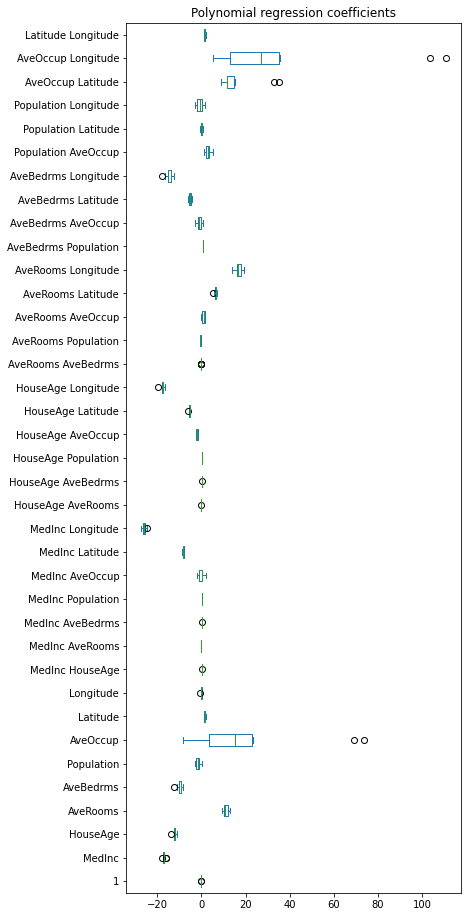

In [ ]:
weights_polynomial_regression.plot.box(vert=False, figsize=(6,16))
plt.title("Polynomial regression coefficients")

From the above box plot, it looks like the weights given to AveOccup and AveOccupLongitude have outliers.

So, plot them for the ridge regression

In [ ]:
feature_names = ridge_results['estimator'][0][0].get_feature_names_out(input_features=train_features.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [ ]:
coefs = [est[-1].coef_ for est in ridge_results['estimator']]
weights_ridge_regression = pd.DataFrame(coefs, columns=feature_names)

Text(0.5, 1.0, 'Ridge regression coefficients')

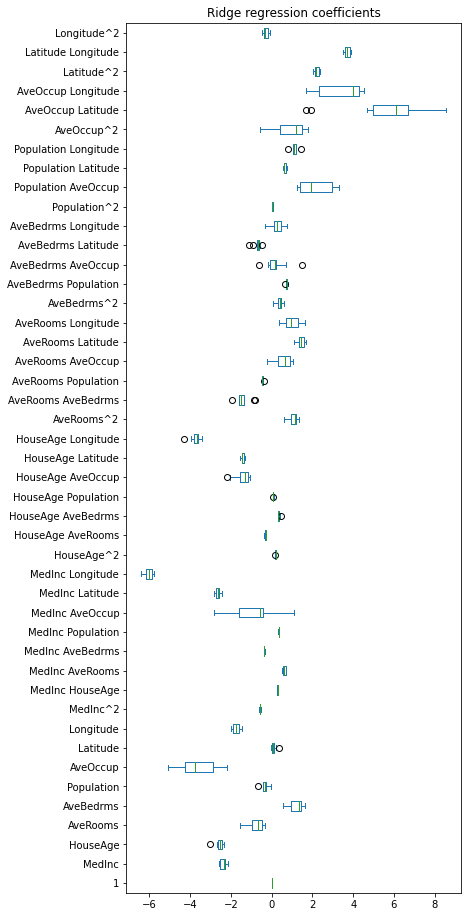

In [ ]:
weights_ridge_regression.plot.box(vert=False, figsize=(6,16))
plt.title("Ridge regression coefficients")

**Performance on test set**

In [ ]:
baseline_model_median = DummyRegressor(strategy='median')
baseline_model_median.fit(train_features, train_labels)
mean_absolute_percentage_error(test_labels, baseline_model_median.predict(test_features))

0.5348927548151625

In [ ]:
mean_absolute_percentage_error(test_labels, lg_results['estimator'][0].predict(test_features))

0.32120472175482906

In [ ]:
mean_absolute_percentage_error(test_labels, poly_sgd_random_search.best_estimator_.predict(test_features))

0.3206446253045344

In [ ]:
mean_absolute_percentage_error(test_labels, poly_results['estimator'][0].predict(test_features))

0.2834129629962902

In [ ]:
mean_absolute_percentage_error(test_labels, ridge_results['estimator'][0].predict(test_features))

0.29207715093905423

In [ ]:
mean_absolute_percentage_error(test_labels, ridge_grid_search.best_estimator_.predict(test_features))

0.27110336451421413

In [ ]:
mean_absolute_percentage_error(test_labels, lasso_grid_search.best_estimator_.predict(test_features))

0.28074969263810107

It looks like the best predictor is ridge regression model, obtained from the GridSearchCV, because that results in the least error